# Capstone Project

In [211]:
import pandas as pd
import numpy as np
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [187]:
meta = pd.read_csv("./archive/Meta.csv")
meta

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22
5,Meta/12.png,12,2,2,2.3
6,Meta/13.png,13,4,0,2.1
7,Meta/14.png,14,3,0,2.2
8,Meta/15.png,15,1,0,3.1
9,Meta/16.png,16,1,0,3.3


In [188]:
train_csv = pd.read_csv("./archive/Train.csv")
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [189]:
train_csv.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [190]:
test_csv = pd.read_csv("./archive/Test.csv")
test_csv

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [215]:
import os
train = []
train_labels = []

for i in range(43):
    path = "/Users/mehmetburakerkan/Desktop/Yapay Zeka/Projects/Capstone Project/archive" + "/Train/" + str(i)
    images = os.listdir(path)

    for img in images:
        
        image = cv2.imread(path + '/' + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((50, 50))
        train.append(np.array(resize_image))
        train_labels.append(i)

            
          


    

# Changing the list to numpy array
train = np.array(train)
train_labels = np.array(train_labels)

In [217]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train, train_labels, test_size=0.3, random_state=42, shuffle=True)

x_train = x_train/255 
x_val = x_val/255



In [222]:
y_train = keras.utils.to_categorical(y_train, 43)
y_val = keras.utils.to_categorical(y_val, 43)

In [242]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation="relu", input_shape=(50, 50, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(43, activation="softmax")])
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_val,y_val))

Epoch 1/10
858/858 [==============================] - 357s 414ms/step - loss: 0.4297 - accuracy: 0.8912 - val_loss: 0.1074 - val_accuracy: 0.9743
Epoch 2/10
858/858 [==============================] - 315s 367ms/step - loss: 0.0453 - accuracy: 0.9901 - val_loss: 0.0568 - val_accuracy: 0.9866
Epoch 3/10
858/858 [==============================] - 254s 296ms/step - loss: 0.0128 - accuracy: 0.9982 - val_loss: 0.0456 - val_accuracy: 0.9884
Epoch 4/10
858/858 [==============================] - 250s 292ms/step - loss: 0.0053 - accuracy: 0.9996 - val_loss: 0.0412 - val_accuracy: 0.9899
Epoch 5/10
858/858 [==============================] - 283s 330ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 0.9928
Epoch 6/10
858/858 [==============================] - 321s 374ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 0.0312 - val_accuracy: 0.9932
Epoch 7/10
858/858 [==============================] - 240s 280ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0302 -

In [244]:
from sklearn.metrics import accuracy_score

test_labels = test_csv["ClassId"].values
imgs = test_csv["Path"].values

test =[]

for img in imgs:
    image = cv2.imread("/Users/mehmetburakerkan/Desktop/Yapay Zeka/Projects/Capstone Project/archive" + '/' +img)
    image_fromarray = Image.fromarray(image, 'RGB')
    resize_image = image_fromarray.resize((50,50))
    test.append(np.array(resize_image))
    
x_test = np.array(test)
x_test = x_test/255



In [248]:
pred = (model.predict(x_test) > 0.5).astype("int32")

395/395 [==============================] - 31s 79ms/step


In [247]:
_, accuracy = model.evaluate(x_test, pred)
print("Accuracy: %.2f" % (accuracy*100))

395/395 [==============================] - 24s 59ms/step - loss: 0.0254 - accuracy: 0.9824
Accuracy: 98.24


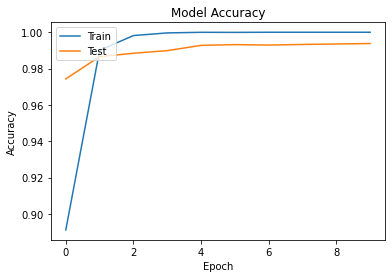

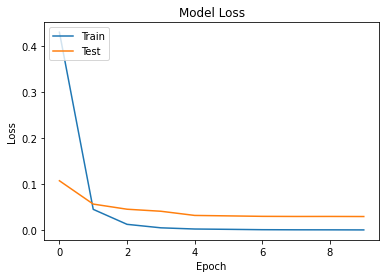

In [249]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"], loc="upper left")
plt.show()